# Core 2 - Preparing Time Series from Wide-Form Data

- Name: Tyler Schelling
- Date: 1/31/2023

---

You will be working with Zillow's publicly available Zillow House Value Index (ZHVI) https://www.zillow.com/research/data/

- Specifically, you will be using the Home Value data set for:
    - Data Type = "ZHVI All Homes (SFR+Condo/Coop) - Time Series - Smoothed - Seasonally Adjusted"
    - Geography = "City"

## Import Libraries | Download Data

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
sns.set_context('notebook',font_scale=0.9)
plt.style.use(['ggplot'])
pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

In [3]:
df = pd.read_csv('Data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"253,690.00","255,517.00",...,"741,586.00","745,686.00","750,578.00","756,734.00","762,321.00","768,797.00","773,944.00","777,692.00","779,960.00","781,622.00"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"234,181.00","234,401.00",...,"924,019.00","928,991.00","937,936.00","953,874.00","973,168.00","990,391.00","992,337.00","992,630.00","978,196.00","966,595.00"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,"109,068.00","109,079.00",...,"245,783.00","248,718.00","252,080.00","256,435.00","261,101.00","265,558.00","268,901.00","271,059.00","272,400.00","272,639.00"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"166,139.00","166,536.00",...,"302,821.00","305,104.00","306,404.00","308,303.00","309,649.00","312,487.00","314,663.00","315,910.00","315,587.00","315,429.00"
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,"114,794.00","114,975.00",...,"269,323.00","274,032.00","278,464.00","284,127.00","289,739.00","294,776.00","297,727.00","298,796.00","299,124.00","298,951.00"


## Part 1

- First, you will prepare the dataset for time series analysis:
    - Load in the Zillow Home Value Index dataframe.
        - Note: it is a large file and may take a minute to load.
    - Filter the 4 largest cities into a new dataframe.
        - Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
            - Therefore the 4 largest cities would have rank values of [0,1,2,3]
    - Melt the data to long-form and prepare it for time series analysis.
        - Convert months into the datetime index.
        - Make it the index.
    - Resample the dataframe in Months, grouped by City.

In [4]:
large_df = df.loc[0:3]
large_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"253,690.00","255,517.00",...,"741,586.00","745,686.00","750,578.00","756,734.00","762,321.00","768,797.00","773,944.00","777,692.00","779,960.00","781,622.00"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"234,181.00","234,401.00",...,"924,019.00","928,991.00","937,936.00","953,874.00","973,168.00","990,391.00","992,337.00","992,630.00","978,196.00","966,595.00"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,"109,068.00","109,079.00",...,"245,783.00","248,718.00","252,080.00","256,435.00","261,101.00","265,558.00","268,901.00","271,059.00","272,400.00","272,639.00"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"166,139.00","166,536.00",...,"302,821.00","305,104.00","306,404.00","308,303.00","309,649.00","312,487.00","314,663.00","315,910.00","315,587.00","315,429.00"


In [5]:
id_vars = large_df.columns[:8]

In [6]:
long_df = pd.melt(large_df, id_vars=id_vars, var_name= 'Date', 
                  value_name = 'Home Value')
long_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Home Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,"253,690.00"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,"234,181.00"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,"109,068.00"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,"166,139.00"
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,"255,517.00"
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,"315,587.00"
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,"781,622.00"
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,"966,595.00"
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,"272,639.00"


In [7]:
long_df['Date'] = pd.to_datetime(long_df['Date'])
long_df = long_df.set_index('Date')
long_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Home Value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"253,690.00"
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"234,181.00"
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,"109,068.00"
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"166,139.00"
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"255,517.00"
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"315,587.00"
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"781,622.00"
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"966,595.00"


In [8]:
grouped_df = long_df.groupby('RegionName').resample('M').asfreq()
grouped_df

RegionID  SizeRank RegionName RegionType StateName  \
RegionName Date                                                             
Chicago    2000-01-31     17426         3    Chicago       city        IL   
           2000-02-29     17426         3    Chicago       city        IL   
           2000-03-31     17426         3    Chicago       city        IL   
           2000-04-30     17426         3    Chicago       city        IL   
           2000-05-31     17426         3    Chicago       city        IL   
...                         ...       ...        ...        ...       ...   
New York   2022-05-31      6181         0   New York       city        NY   
           2022-06-30      6181         0   New York       city        NY   
           2022-07-31      6181         0   New York       city        NY   
           2022-08-31      6181         0   New York       city        NY   
           2022-09-30      6181         0   New York       city        NY   

                      State                                  Metro  \
RegionName Date                                                      
Chicago    2000-01-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-02-29    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-03-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-04-30    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-05-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
...                     ...                                    ...   
New York   2022-05-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2022-06-30    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2022-07-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2022-08-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2022-09-30    NY  New York-Newark-Jersey City, NY-NJ-PA   

                          CountyName  Home Value  
RegionName Date                                   
Chicago    2000-01-31    Cook County  166,139.00  
           2000-02-29    Cook County  166,536.00  
           2000-03-31    Cook County  167,368.00  
           2000-04-30    Cook County  168,826.00  
           2000-05-31    Cook County  170,499.00  
...                              ...         ...  
New York   2022-05-31  Queens County  768,797.00  
           2022-06-30  Queens County  773,944.00  
           2022-07-31  Queens County  777,692.00  
           2022-08-31  Queens County  779,960.00  
           2022-09-30  Queens County  781,622.00  

[1092 rows x 9 columns]

In [9]:
city_ts = grouped_df['Home Value']
city_ts

RegionName  Date      
Chicago     2000-01-31   166,139.00
            2000-02-29   166,536.00
            2000-03-31   167,368.00
            2000-04-30   168,826.00
            2000-05-31   170,499.00
                            ...    
New York    2022-05-31   768,797.00
            2022-06-30   773,944.00
            2022-07-31   777,692.00
            2022-08-31   779,960.00
            2022-09-30   781,622.00
Name: Home Value, Length: 1092, dtype: float64

In [10]:
city_unstacked = city_ts.unstack(0)
city_unstacked

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,"166,139.00","109,068.00","234,181.00","253,690.00"
2000-02-29,"166,536.00","109,079.00","234,401.00","255,517.00"
2000-03-31,"167,368.00","108,878.00","235,513.00","257,207.00"
2000-04-30,"168,826.00","108,881.00","237,589.00","260,310.00"
2000-05-31,"170,499.00","108,834.00","240,113.00","263,204.00"
...,...,...,...,...
2022-05-31,"312,487.00","265,558.00","990,391.00","768,797.00"
2022-06-30,"314,663.00","268,901.00","992,337.00","773,944.00"
2022-07-31,"315,910.00","271,059.00","992,630.00","777,692.00"


## Part 2

- Once you've prepared the dataframe with the time series data for the 4 largest cities:
    - Plot the home values for all 4 cities. (Hint: use unstack)
        - Make sure to add a title and axis labels.
        - Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
            - Hint: use the FuncFormatter from matplotlib.
    - Answer the following 2 questions using pandas:
        1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
            - Hint: use either pd.IndexSlice or .unstack() to get the answer.
        2) How much did the home values change from November 2008 to December 2008 (in dollars)?
            - Hint: you can use .diff() to calculate the change in values

In [11]:
def thousands(x,pos):
    new_x = x/1_000
    return f"{new_x:,.0f}K"

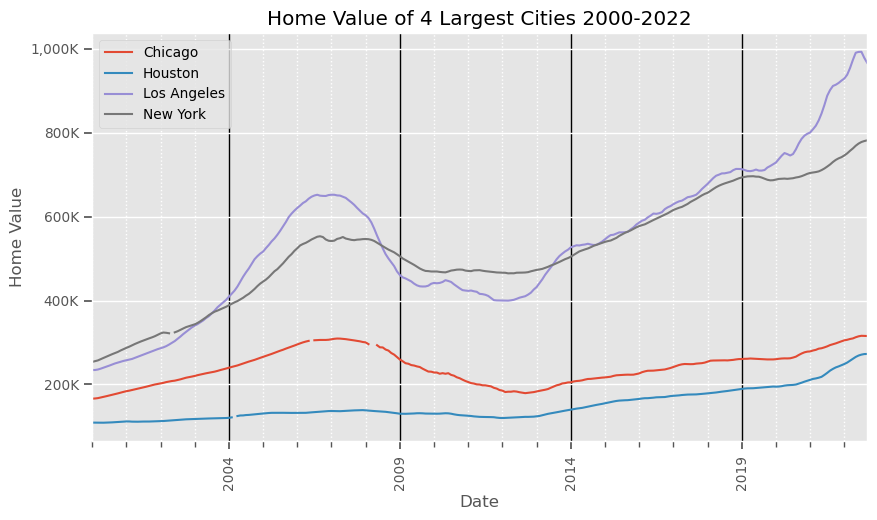

In [12]:
fig, ax = plt.subplots(figsize = (10, 6))
city_unstacked.plot(ax = ax, title = 'Home Value of 4 Largest Cities 2000-2022')

ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')

ax.yaxis.set_major_formatter(mticks.FuncFormatter(thousands))
ax.set_ylabel('Home Value')
ax.set_xlabel('Date')
fig.autofmt_xdate(rotation=90,ha='center')
ax.legend(loc='upper left');

### Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [13]:
max_pop = long_df.groupby('RegionName').resample('Y').max()
max_ts = max_pop['Home Value']
max_ts.unstack(0).loc['2008']

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-12-31,"300,207.00","138,208.00","603,029.00","546,538.00"


- LA had the highest home value in 2008 of $603K

- Houston had the lowest home value in 2008 of $138K

### How much did the home values change from November 2008 to December 2008 (in dollars)?

In [14]:
diff_pop = long_df.resample('M').max()
d_ts = max_pop['Home Value']
ts_diff = max_ts.diff()
ts_diff

RegionName  Date      
Chicago     2000-12-31         NaN
            2001-12-31   18,834.00
            2002-12-31   17,672.00
            2003-12-31   19,097.00
            2004-12-31   25,538.00
                            ...   
New York    2018-12-31   37,163.00
            2019-12-31    4,947.00
            2020-12-31    5,726.00
            2021-12-31   39,687.00
            2022-12-31   40,036.00
Name: Home Value, Length: 92, dtype: float64

In [15]:
diff_pop = long_df.resample('M').mean()
ts_diff = diff_pop['Home Value']
ts_diff = ts_diff.diff()
ts_diff['2008-12']

C:\Users\tyler\AppData\Local\Temp\ipykernel_28448\842084652.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff_pop = long_df.resample('M').mean()


Date
2008-12-31   -5,946.50
Freq: M, Name: Home Value, dtype: float64

- Between 11/2008 and 12/2008, home values decreased by $5,946 on average